In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [100]:
from sklearn.preprocessing  import PolynomialFeatures

In [ ]:
# x, y, z == x2, y2, z2, xy, xz, yz, 1

In [101]:
data = np.array([[2, 3, 4]])
print(data)

[[2 3 4]]


In [102]:
trans = PolynomialFeatures(degree=2, include_bias=False)

In [103]:
trans

PolynomialFeatures(include_bias=False)

In [104]:
trans.fit(data) 

PolynomialFeatures(include_bias=False)

In [105]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [62]:
trans.fit_transform(data) # fit and transform together

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [106]:
df = pd.read_csv("Advertising.csv")

In [107]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [108]:
X = df.drop("sales", axis = 1)

In [109]:
y = df.sales

In [110]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias = False)

In [111]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [112]:
poly_features = polynomial_converter.transform(X)

In [113]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [114]:
poly_features.shape

(200, 9)

In [115]:
pd.DataFrame(poly_features, columns =  ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"])

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


In [116]:
X.shape

(200, 3)

In [74]:
pd.DataFrame(poly_features[0],  ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["New_feature"])

,New_feature
TV,230.10
radio,37.80
newspaper,69.20
TV^2,52946.01
TV&Radio,8697.78
TV&Newspaper,15922.92
Radio^2,1428.84
Radio&newspaper,2615.76
Newspaper^2,4788.64


### *Train / Test Split*

In [117]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
model_poly = LinearRegression(fit_intercept=True)

In [124]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = model_poly.predict(X_test)

In [126]:
my_dict = {"Actual": y_test, "pred": y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred
37,14.7,13.948562
109,19.8,19.334803
31,11.9,12.319282
89,16.7,16.762863
66,9.5,7.902109
119,6.6,6.941438
54,20.2,20.133727
74,17.0,17.500927
145,10.3,10.568890
142,20.1,20.125518


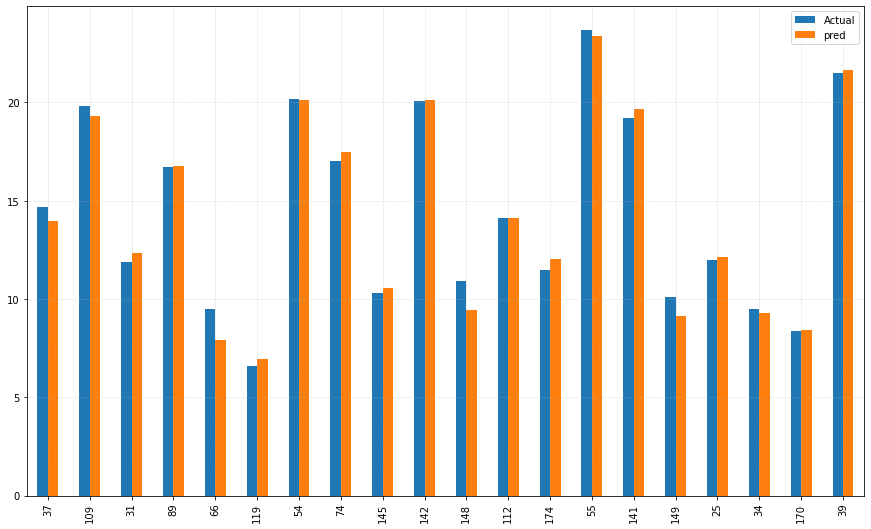

In [127]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5')
plt.show();

In [128]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [129]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [155]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [132]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [133]:
df_features = pd.DataFrame(poly_features[0], index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["features_value"])

In [134]:
df_features

,features_value
TV,230.10
radio,37.80
newspaper,69.20
TV^2,52946.01
TV&Radio,8697.78
TV&Newspaper,15922.92
Radio^2,1428.84
Radio&newspaper,2615.76
Newspaper^2,4788.64


In [135]:
df_coef.coef*df_features.features_value

TV                 11.898375
radio               0.494609
newspaper           0.830401
TV^2               -5.871314
TV&Radio            9.933967
TV&Newspaper       -0.834520
Radio^2             0.047855
Radio&newspaper     0.382896
Newspaper^2        -0.145917
dtype: float64

In [136]:
y_0 = df_coef.coef*df_features.features_value

In [137]:
y_0 = 

SyntaxError: invalid syntax (<ipython-input-137-f68640b2ea76>, line 1)

In [144]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

In [145]:
y_0.sum() + model_poly.intercept_

21.861906993140316

### *Let's Compare Results Of Linear And Poly Regression* 

In [92]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=101)

In [93]:
model_linear = LinearRegression(fit_intercept=True)

In [94]:
model_linear.fit(X_train2, y_train2)

LinearRegression()

In [95]:
model_linear.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [96]:
coef = pd.DataFrame(model_linear.coef_, index = X.columns, columns = ["coef"])
coef

,coef
TV,0.044696
radio,0.187566
newspaper,-0.000323


In [97]:
feature = pd.DataFrame(X.loc[0].values, index = X.columns, columns = ["features"])
feature

,features
TV,230.1
radio,37.8
newspaper,69.2


In [98]:
y_1 = coef.coef*feature.features

In [99]:
y_1

TV           10.284548
radio         7.089984
newspaper    -0.022335
dtype: float64

In [141]:
pd.concat([y_0, y_1], axis=1).rename(columns = {0:"poly", 1:"linear"})

,poly,linear
TV,11.898375,10.284548
radio,0.494609,7.089984
newspaper,0.830401,-0.022335
TV^2,-5.871314,NaN
TV&Radio,9.933967,NaN
TV&Newspaper,-0.834520,NaN
Radio^2,0.047855,NaN
Radio&newspaper,0.382896,NaN
Newspaper^2,-0.145917,NaN


### *Evaluation On The Test Set*

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [143]:
test_predictions = model_poly.predict(X_test)

In [148]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

In [149]:
eval_metric(y_test, test_predictions)

r2_score: 0.9843529333146797 
 mae: 0.48967980448035436 
 mse: 0.44175055104033706 
 rmse: 0.6646431757268987


In [150]:
y_train_pred = model_poly.predict(X_train)

In [151]:
eval_metric(y_train, y_train_pred)

r2_score: 0.9868638137712757 
 mae: 0.4049248139151398 
 mse: 0.34569391424439977 
 rmse: 0.5879574085292231


### *Let's Find Optimal Degree Of Poly*

In [156]:
def poly(d):
    train_rmse_errors = []
    test_rmse_errors = []
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors})                                                 


In [157]:
poly(10)

,train_rmse_errors,test_rmse_errors
0,1.734594,1.516152
1,0.587957,0.664643
2,0.433934,0.580329
3,0.351708,0.507774
4,0.250934,2.575816
5,0.203038,4.120127
6,5.429521,1368.353832
7,0.208638,4031.580724
8,0.177050,99797.386878
